In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [5]:
#function for an ideal string on an ideal pulley
def idealstring_idealpulley(t, m1, m2, mu):
    a = (9.8 * (m2 - m1*mu))/(m1 + m2) #acceleration of the system
    v = a * t #velocity
    s = (1/2) * a * t**2 #displacement
    return a, v, s

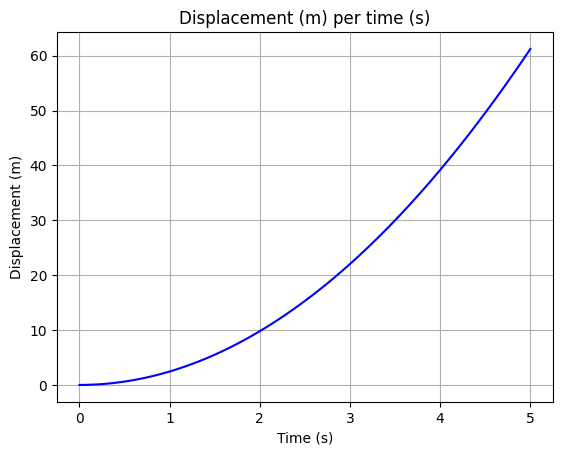

In [8]:
steps = 100 #number of steps used in the graph
m1 = 2 #object 1's mass, in kg
m2 = 4 #object 2's mass, in kg
mu = 0.5 #kinetic fraction coefficient
t = np.linspace(0,5,steps) #time in seconds
a = list()
a_1, v_1, s_1 = idealstring_idealpulley(t, m1, m2, mu)

for i in range(0,steps):
    a.append(a_1)
    #this is a work around i made to be able to plot the line for acceleration. as you may see, the function idealstring_idealpulley
    #returns acceleration as a single value, which matplotlib does not accept to plot. therefore, i made this list to be
    #able to plot a straight line to represent acceleration constant in time.

#plot
plt.plot(t, s_1, color='blue')
#plt.plot(t, v_1, color='orange')
#plt.plot(t, a, color='red')
plt.ylabel("Displacement (m)")
plt.xlabel('Time (s)')
plt.title("Displacement (m) per time (s)")
plt.grid()
plt.plot()
plt.savefig('disp1.png')

In [9]:
#function for an ideal string on a massive pulley
def idealstring_massivepulley(t, m1, m2, mu, i_cm, r):
    a = (9.8 * r * (m2 - m1 * mu))/((i_cm/r) + m1 * r + m2 * r) #acceleration
    v = a * t #velocity
    s = (1/2) * a * t**2 #displacement
    return a, v, s

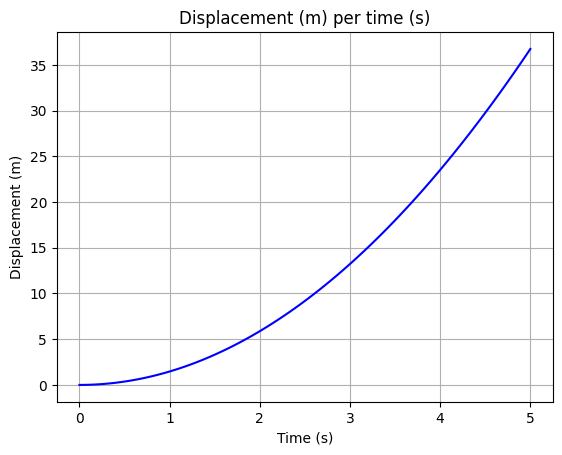

In [12]:
steps = 100 #number of steps used in the graph
m1 = 2 #object 1's mass, in kg
m2 = 4 #object 2's mass, in kg
mu = 0.5 #kinetic fraction coefficient
i_cm = 1.0 #moment of inertia of the pulley, in kg m²
r = 0.5 #radius of the pulley, in meters
t = np.linspace(0,5,steps) #time in seconds
a = list()
a_2, v_2, s_2 = idealstring_massivepulley(t, m1, m2, mu, i_cm, r)

for i in range(0,steps):
    a.append(a_2)

#plot
plt.plot(t, s_2, color='blue')
#plt.plot(t, v_2, color='orange')
#plt.plot(t, a, color='red')
plt.xlabel('Time (s)')
plt.ylabel("Displacement (m)")
plt.title("Displacement (m) per time (s)")
plt.grid()
plt.plot()
plt.savefig('disp2.png')

In [13]:
#function for a massive string on an ideal pulley. here, to integrate, we define that x = x[0], v = x[1] and a = x[2].
#that way, we transform the 2° degree ODE in a 1° degree ODE, that odeint can integrate
def massivestring_idealpulley(x, t, m1, m2, mu, lambd, L, l0):
    a = ((9.8 * lambd * x[0]) - 9.8*(mu * m1 - m2 - l0*lambd))/(m1 + m2 + L * lambd)
    return [x[1], a]

In [14]:
def massivestring_idealpulley_acceleration(t, x, m1, m2, mu, lambd, L, l0):
    a = ((9.8 * lambd * x) - 9.8*(mu * m1 - m2 - l0*lambd))/(m1 + m2 + L * lambd)
    return a

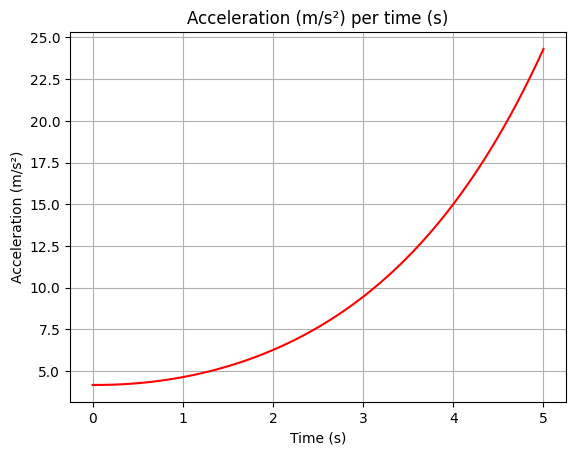

In [17]:
steps = 100 #number of steps used to make the graph
m1 = 2 #object 1's mass, in kg
m2 = 4 #object 2's mass, in kg
mu = 0.5 #kinetic fraction coefficient
lambd = 0.2 #kg/m³
L = 10 #meters
l0 = 2 #meters
t = np.linspace(0,5,steps) #time in seconds
sol = odeint(massivestring_idealpulley, [0,0], t, args=(m1, m2, mu, lambd, L, l0)) #numerical integration

#lists, to keep the values from integration and plot
s_3= list()
v_3 = list()
a_3 = list()

#putting the values from sol on the lists
for i in range(0, steps):
    s_3.append(sol[i][0])
    v_3.append(sol[i][1])
    a= massivestring_idealpulley_acceleration(t[i], s_3[i-1], m1, m2, mu, lambd, L, l0)
    a_3.append(a)

#plot
#plt.plot(t, s_3, color='blue')
#plt.plot(t, v_3, color='orange')
plt.plot(t, a_3, color='red')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.title("Acceleration (m/s²) per time (s)")
plt.grid()
plt.plot()
plt.savefig('acceleration3.png')

In [18]:
#function for a massive string on a massive pulley. again, we define x = x[0], v=x[1], and a=x[2].
def massivestring_massivepulley(x, t, m1, m2, mu, lambd, L, l0, i_cm, r):
    return [x[1], ((9.8 * lambd * x[0]) - 9.8*(mu * m1 - (m2 + l0)* lambd))/(m1 + m2 + L * lambd + i_cm/r**2)]

In [19]:
def massivestring_massivepulley_acceleration(t,x,m1,m2,mu, lambd, L, l0, i_cm, r):
    a = ((9.8 * lambd * x) - 9.8*(mu * m1 - (m2 + l0)* lambd))/(m1 + m2 + L * lambd + i_cm/r**2)
    return a

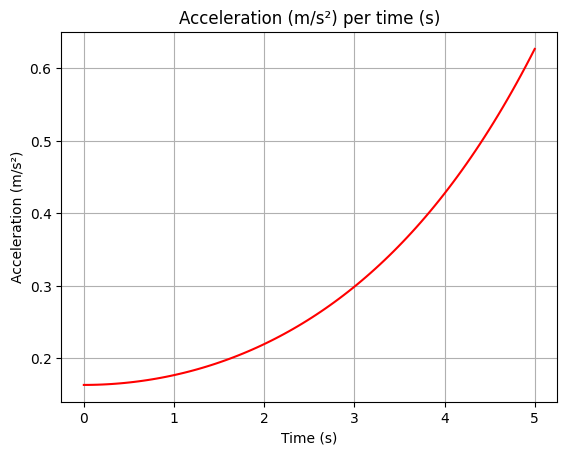

In [22]:
steps = 100 #number of steps used to make the graph
m1 = 2 #object 1's mass, in kg
m2 = 4 #object 2's mass, in kg
mu = 0.5 #kinetic fraction coefficient
lambd = 0.2 #kg/m³
L = 10 #meters
l0 = 2 #meters
i_cm = 1.0 #moment of inertia of the pulley, in kg m²
r = 0.5 #radius of the pulley, in meters
t = np.linspace(0,5,steps) #time in seconds
sol = odeint(massivestring_massivepulley, [0,0], t, args=(m1, m2, mu, lambd, L, l0, i_cm, r)) #numerical integration

#lists, to keep the values from integration and plot
s_4= list()
v_4 = list()
a_4= list()

#putting the values from sol on the lists
for i in range(0, steps):
    s_4.append(sol[i][0])
    v_4.append(sol[i][1])
    a = massivestring_massivepulley_acceleration(t[i], s_4[i], m1, m2, mu, lambd, L, l0, i_cm, r)
    a_4.append(a)

#plot
#plt.plot(t, s_4, color='blue')
#plt.plot(t, v_4, color='orange')
plt.plot(t, a_4, color='red')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.title("Acceleration (m/s²) per time (s)")
plt.grid()
plt.plot()
plt.savefig('acceleration4.png')